# Binäres Klassifikationsproblem von Basilikum und Petersilie
In diesem Notebook wird versucht ein Neuronales Netz zur Klassifikation von Basilikum bzw. Petersilie anhand von Bilddaten zu entwickeln, trainieren und evaluieren.


---


**1. Ansatz: Neuronales Netz von Grund auf entwickeln und trainiern**

Zunächst wird ein Convolutional Neural Network von grund auf entwickelt und unter Verwendung von Data Augmentation trainiert


---


**2. Ansatz: Erweiterung eines Vortrainierten Modells**

Im zweiten Teil wird Faltungsbasis eines vortrainierten Modells als Basis verwendet und durch den Klassifiziere erweitert. Anschließend wird dieses Modell ebenfalls unter Verwendung von Data Augmentation trainiert.

# **Start 1. Ansatz**

In [ ]:
import tensorflow as tf
import keras

In [ ]:
!pip show keras

Name: keras
Version: 2.14.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


Zunächst überprüfen um welche Versionen es sich handelt. Es werden die neusten Versionen (tf = 2.16.1 und keras = 3.3.3) empfohlen, andernfalls bedarf es Anpassungen im Code.

In [ ]:
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

Tensorflow Version: 2.17.0
Keras Version: 3.4.1


Gegebenenfalls verionen updaten

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

In [ ]:
from keras import layers
from keras import models

## Aufbau des Modells

Das Modell besteht aus einer Faltunsbasis bestehend aus 4 Convolutional Layers mit jeweils einem Max-Pooling Layer.
(Erinnerung: Convolutional Layer Filtern Bilder über Matrixmultiplikation, MaxPooling reduziert dann Parameter also wird auf die "interessanten Merkmale" reduziert)
Anschließend folgt der Klassifikationsteil in Form von eime, Flatten einem Dense und den Ausgangs-Dense-Layer. Um Overfitting zu verhindern wurde ein Dropout Layer eingefügt.

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(512, activation="relu"))

model.add(layers.Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras import optimizers

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=0.01),
              metrics=["acc"])

In [ ]:
model.summary()

Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_456 (Conv2D)                  │ (None, 198, 198, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_456 (MaxPooling2D)     │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_457 (Conv2D)                  │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_457 (MaxPooling2D)     │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_458 (Conv2D)                  │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_458 (MaxPooling2D)     │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_459 (Conv2D)                  │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_459 (MaxPooling2D)     │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_114 (Flatten)                │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_114 (Dropout)                │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_228 (Dense)                    │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_229 (Dense)                    │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,794,881 (25.92 MB)

 Trainable params: 6,794,881 (25.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Vorverarbeitung der Bilddaten
Für den Trainingsdatensatz wird mit Hilfe des ImageDataGenerator objekts Data Augmentation durchgeführt. Die Bilder werden mit jedem Anzeigen gedreht gezoomed etc. sodass trotz kleinem Datensatz dass Modell nie dasselebe Bild sieht. Dies dient ebenfalls der Vermeidung von Overfitting.

Des Weiteren werden die Bilder in Graustufenformat umgewandelt da die Farbe der Pflanzen zur Unterscheidung nicht relevatn sind.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Set_12_05_24/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/Set_12_05_24/validation"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=10,
    class_mode="binary",
    color_mode="grayscale"
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=10,
    class_mode="binary",
    color_mode="grayscale"
)

Found 654 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


In [ ]:
# Anzahl der Schritte pro Epoche
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 250ms/step - acc: 0.5455 - loss: 0.6896 - val_acc: 0.5375 - val_loss: 0.6903
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.5000 - loss: 0.6963 - val_acc: 0.5000 - val_loss: 0.6962
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 250ms/step - acc: 0.5315 - loss: 0.6919 - val_acc: 0.5375 - val_loss: 0.6904
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.4000 - loss: 0.7134 - val_acc: 0.5000 - val_loss: 0.6963
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - acc: 0.5437 - loss: 0.6901 - val_acc: 0.5375 - val_loss: 0.6903
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - acc: 0.6000 - loss: 0.6814 - val_acc: 0.5000 - val_loss: 0.6958
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - acc: 0.5492 - loss: 0.6889 - val_acc: 0.5312 - val_loss: 0.6912
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - acc: 0.5000 - loss: 0.6951 - val_acc: 1.0000 - val_loss: 0.6334
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - a

## Trainingssauswertung
Es ist zu sehen, dass keine guten Ergebnisse erzählt werden. Die Genauigkeit springt ab und zu mal in Richtung 80 % es ist aber kein steigender Verlauf zu beobachten. Das gleiche Auf Validierungsseite. Der Loss ist auf beiden Seiten zu hoch. Das Modell hat starke Probleme die Klassifizierung der beiden Pflanzen zu erlernen, da in Summe zu wenig Daten vorliegen um es von Grund auf zu trainieren.

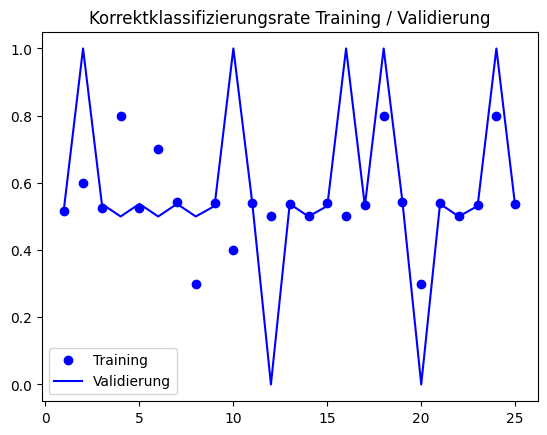

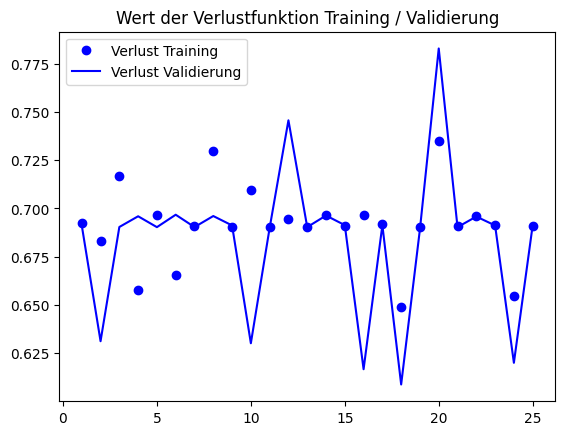

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training")
plt.plot(epochs, val_acc, "b", label="Validierung")
plt.title("Korrektklassifizierungsrate Training / Validierung")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Verlust Training")
plt.plot(epochs, val_loss, "b", label="Verlust Validierung")
plt.title("Wert der Verlustfunktion Training / Validierung")
plt.legend()
plt.figure()

plt.show()

# **Start 2. Ansatz**
Auch hier wird wirder der ImageDataGenerator zur Dataaumentation der Trainingsbilder benutzt. Zu beachten ist, dass das vortrainierte Modell mit Bildern im RGB Format trainiert wurde. Deshalb wurde eine Funktion geschrieben, die Graustufenbilder von einem Kanal auf 3 erweitert sodass sie das Richtige Format für die Eingabeschicht des vortrainierten Modells haben.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Funktion zur Erweiterung des Graustufenbildes auf drei Kanäle
def to_grayscale_with_channels(image):
    # Bild in Grayscale konvertieren
    grayscale_image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

    # Erzeuge ein 3-Kanal-Grayscale-Bild
    grayscale_image_3_channels = np.stack((grayscale_image,)*3, axis=-1)

    return grayscale_image_3_channels

train_dir = "/content/drive/MyDrive/Colab Notebooks/Set_12_05_24/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/Set_12_05_24/validation"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    #width_shift_range=0.2,
    #shear_range=0.1,
    #zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=to_grayscale_with_channels,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=to_grayscale_with_channels)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=10,
    class_mode="binary",
    color_mode="rgb"
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=10,
    class_mode="binary",
    color_mode="rgb"
)

Found 654 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


Probeweise ein Bild plotten um zu sehen, dass es Grau aber im 3-Kanäligen Format vorliegt.

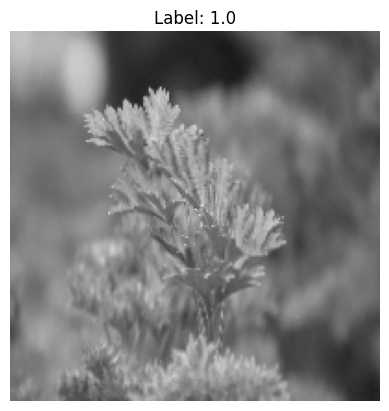

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ein Bild aus dem Trainingsgenerator laden
images, labels = next(train_generator)

# Das erste Bild auswählen
image = images[0]

# Bild anzeigen
plt.imshow(image)
plt.title(f"Label: {labels[0]}")
plt.axis("off")
plt.show()

# graue bilder erweitert auf 3 kanäle, sodass sie für VGG16 benutzt werden können

## Import des Vortrainierten Modells
Es wird die Faltungsbasis des VGG16 Modells importiert. Dieses Modell wurde mit ca. 1,4 Millionen Bildern (ImageNet Database) unterteilt in 1000 Klassen trainiert. Bei den Bildern handelte es sich vorangig um Tiere und Alltagsgegnstände.

Es wird nur die Faltungsbasis importiert, da diese quasi den allgmeinen Teil also das "Wissen" zum herausfinden intersannter Merkmale enthält aber im Prinzip noch nicht so spezialisiert auf eine einzele Aufgabe ist.

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(200, 200, 3))

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 100, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 50, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## Erweiterung des Modells

Die VGG16 Faltungsbasis wird um den Klassifizierer erweitert der dann die neue Aufgabe (dem Klassifizieren von Basilikum und Petersilie) antrainiert werden soll.

In [ ]:
from keras import layers
from keras import models

# Erstellen des Modells mit der Functional API
inputs = layers.Input(shape=(200, 200, 3))
x = conv_base(inputs, training=False)  # Führe die VGG16-Basis auf den Eingaben aus
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = models.Model(inputs, outputs)

# Zusammenfassung des Modells anzeigen
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 6, 6, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,433,793 (74.13 MB)

 Trainable params: 19,433,793 (74.13 MB)

 Non-trainable params: 0 (0.00 B)

**Einfrierend der Faltungsbasis**

Das Vortrainierte Modell wird zum Trainieren eingefroren.
Hintergrund ist, dass sonst mit jeder Trainingsepoche auch die struktur des Vortrainierten teils verändert wird, was wir erstens nicht wollen, da es Ewigkeiten daueren würde und zweitens und deshalb vor allem nicht, weil sonst die wichtigen schon erlernten Fähigkeiten verloren gehen.

In [ ]:
conv_base.trainable = False

In [ ]:
from keras import optimizers

model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=["accuracy"])

## Training

In [ ]:
# Anzahl der Schritte pro Epoche
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.7644 - loss: 0.5051 - val_accuracy: 0.8938 - val_loss: 0.3218
Epoch 2/25
 1/65 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.6000 - loss: 0.6800

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6000 - loss: 0.6800 - val_accuracy: 0.5000 - val_loss: 1.0786
Epoch 3/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 309ms/step - accuracy: 0.8904 - loss: 0.3137 - val_accuracy: 0.8875 - val_loss: 0.3010
Epoch 4/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8000 - loss: 0.3710 - val_accuracy: 1.0000 - val_loss: 0.1263
Epoch 5/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.8748 - loss: 0.2830 - val_accuracy: 0.9125 - val_loss: 0.2562
Epoch 6/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.9000 - loss: 0.3806 - val_accuracy: 0.5000 - val_loss: 1.7503
Epoch 7/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 23s 331ms/step - accuracy: 0.9116 - loss: 0.2500 - val_accuracy: 0.9187 - val_loss: 0.2603
Epoch 8/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7000 - loss: 0.3964 - val_accuracy: 1.0000 - val_loss: 0.2471
Epoch 9/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 39s 336ms/step - accuracy: 0.8869 - loss: 0.2520 - val_accuracy: 0.9000 - val

## Trainingsauswertung

Es ist eine deutliche Steigerung zu beobachten.
Es gibt zwar ein paar Ausreiser (könnte am Datensatz liegen es gibt wahrscheinlich noch ein zwei Bilder mit transparnetem Hintergrund und das mag das Programm nicht so) aber insgesamt ist dies ein sehr guter Trainingsverlauf.

Man sieht das sowohl Trainings als auch Valifierungsgenauigkeit steigen und der loss auf beiden Seiten fällt.

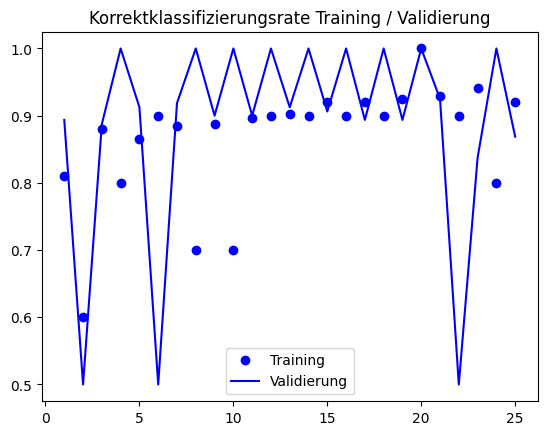

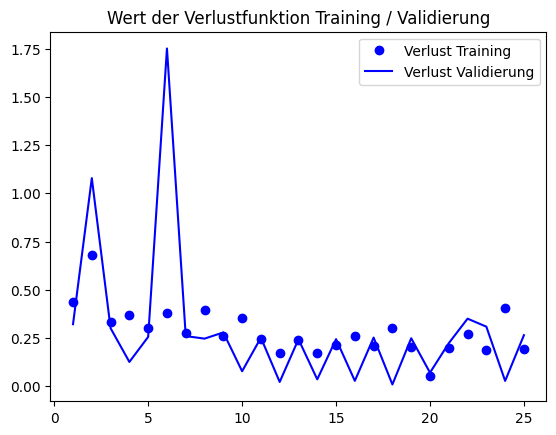

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training")
plt.plot(epochs, val_acc, "b", label="Validierung")
plt.title("Korrektklassifizierungsrate Training / Validierung")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Verlust Training")
plt.plot(epochs, val_loss, "b", label="Verlust Validierung")
plt.title("Wert der Verlustfunktion Training / Validierung")
plt.legend()
plt.figure()

plt.show()

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 6, 6, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,152,900 (92.14 MB)

 Trainable params: 4,719,105 (18.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,719,107 (18.00 MB)

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/models/modelOhneFein.h5")

## Feinabstimmung
Zur Feinabstimmung werden nuch nach Training der letzte Convolutional Block "aufgetaut" und das Modell erneut trainiert.
Der Hintergrund ist. Die ersten schichten des Modells sind für allgemeiner Merkmale zuständig, die tieferen Schichten wiederum für spezifischere je nach Aufgabe des Modells.
Um also die beiden Teile Faltungsbasis und Klassifizierer aufeinander abzustimmen wird der "Übergang" aufgetaut um das Modell endgültig auf seine neue Aufgabe umzutrainieren.

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True

  if set_trainable == True:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
    print(f"Layer: {layer.name}, Trainable: {layer.trainable}")


Layer: input_layer, Trainable: False
Layer: block1_conv1, Trainable: False
Layer: block1_conv2, Trainable: False
Layer: block1_pool, Trainable: False
Layer: block2_conv1, Trainable: False
Layer: block2_conv2, Trainable: False
Layer: block2_pool, Trainable: False
Layer: block3_conv1, Trainable: False
Layer: block3_conv2, Trainable: False
Layer: block3_conv3, Trainable: False
Layer: block3_pool, Trainable: False
Layer: block4_conv1, Trainable: False
Layer: block4_conv2, Trainable: False
Layer: block4_conv3, Trainable: False
Layer: block4_pool, Trainable: False
Layer: block5_conv1, Trainable: True
Layer: block5_conv2, Trainable: True
Layer: block5_conv3, Trainable: True
Layer: block5_pool, Trainable: True


## Feinabstimmung Training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_cb = ModelCheckpoint(
    "/content/drive/MyDrive/Colab Notebooks/models/best_Model_Fein_7_8_2024_.keras",
    save_best_only=True,  # Nur speichern, wenn sich der Validierungsverlust verbessert
    monitor="val_loss",  # Überwachen des Validierungsverlusts
    mode="min"  # Minimierung des Validierungsverlusts
)

model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

# Anzahl der Schritte pro Epoche
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb]
)

Epoch 1/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 354ms/step - accuracy: 0.9184 - loss: 0.2013 - val_accuracy: 0.8625 - val_loss: 0.2506
Epoch 2/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 3/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 341ms/step - accuracy: 0.9423 - loss: 0.1692 - val_accuracy: 0.8938 - val_loss: 0.2020
Epoch 4/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8000 - loss: 0.3770 - val_accuracy: 0.5000 - val_loss: 1.2724
Epoch 5/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 37s 319ms/step - accuracy: 0.9287 - loss: 0.1700 - val_accuracy: 0.9125 - val_loss: 0.1748
Epoch 6/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9000 - loss: 0.2049 - val_accuracy: 1.0000 - val_loss: 7.4447e-05
Epoch 7/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 321ms/step - accuracy: 0.9509 - loss: 0.1232 - val_accuracy: 0.9500 - val_loss: 0.1769
Epoch 8/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.8000 - loss: 0.4683 - val_accurac

## Trainingsauswertung

Die Daten könnten noch geglättet werden aber man sieht erneut eine deutliche Verbesserung. Die Klassifizierungsgenauikeit auf Validierungsseite befindet sich zwischen 94 und 98 % und der loss zwischen 5 und 20 % was für einen sehr erfolgreichen Trainingsverlauf spricht.

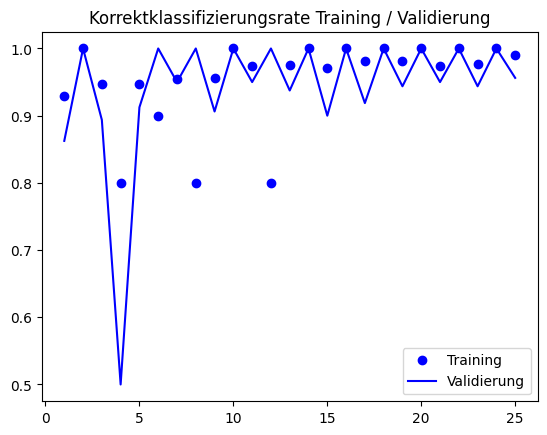

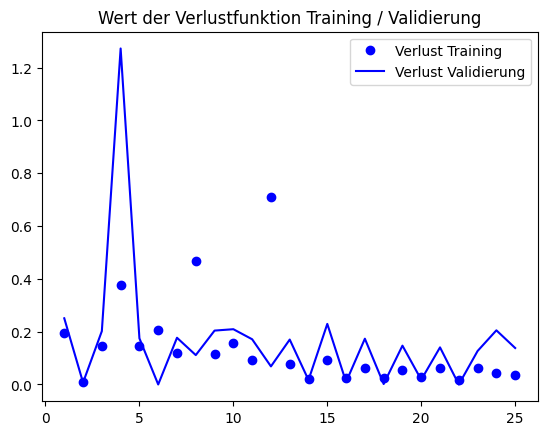

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training")
plt.plot(epochs, val_acc, "b", label="Validierung")
plt.title("Korrektklassifizierungsrate Training / Validierung")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Verlust Training")
plt.plot(epochs, val_loss, "b", label="Verlust Validierung")
plt.title("Wert der Verlustfunktion Training / Validierung")
plt.legend()
plt.figure()

plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/models/modelMitFein_07_08_2024.keras")

## Modelltest
Zum Schluss testen wir jetzt die tatsächliche Qualität unseres Modells.
Es werden ca. 90 Testbilder die nicht im Trainingsprozess verwendet wurden geladen und mit dem ImageDataGenerator in das für das Modell korrekte Format gebracht.

In [ ]:
test_dir = "/content/drive/MyDrive/Colab Notebooks/Set_12_05_24/test"

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=to_grayscale_with_channels,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=10,
    class_mode="binary",
    color_mode="rgb"
)

Found 89 images belonging to 2 classes.


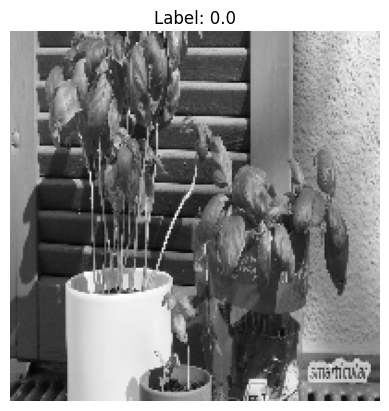

In [ ]:
# Ein Bild aus dem Test Generator laden
images, labels = next(test_generator)

# Das erste Bild auswählen
image = images[0]

# Bild anzeigen
plt.imshow(image)
plt.title(f"Label: {labels[0]}")
plt.axis("off")
plt.show()

# graue bilder erweitert auf 3 kanäle, sodass sie für VGG16 benutzt werden können

## Testdurchführung und -auswertung

Das Modell erzielt bei den Testbildern eine Klassifizierungsgenauigkeit von 90% und ein loss von 30 %. Die sind sehr gute Ergebnisse in Anbetracht der geringen Menge an Daten die zum Training zur Verfügung standen und wenn man sich an die ersten Ergebnisse des von Grund auf neu trainierten Modells erinnert.

In [ ]:
testModel = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/models/modelMitFein_07_08_2024.keras")

In [ ]:
import numpy as np

# Anzahl der Schritte
test_steps = test_generator.samples // test_generator.batch_size

# Testen des Modells
test_loss, test_acc = testModel.evaluate(test_generator, steps=test_steps)

print("Test Accuracy:", test_acc)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.9469 - loss: 0.1362
Test Accuracy: 0.949999988079071


In [ ]:
testModel.export("/content/drive/MyDrive/Colab Notebooks/models/export")

Saved artifact at '/content/drive/MyDrive/Colab Notebooks/models/export'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134239047035088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134239036826096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134239036926512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134239036925632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134239036927392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134239036928272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134239036998752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134239036997872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134239036999808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134239037001744: TensorSpec(shape=(), dtype=tf.